> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [45]:
# Use this cell to set up import statements for all of the packages that you
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [46]:
# loading data and prinitng out a few lines.
df=pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [47]:
df.shape

(10866, 21)

In [48]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [50]:
df.isnull().sum() 

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [51]:
# Inspecting values in each column to undertand the data
for column in df:
    print(column)
    print(df[column].value_counts())
    print("\n")

id
42194     2
135397    1
9534      1
70476     1
44345     1
         ..
71689     1
60422     1
73588     1
85449     1
22293     1
Name: id, Length: 10865, dtype: int64


imdb_id
tt0411951    2
tt0369610    1
tt0381442    1
tt0428441    1
tt0349416    1
            ..
tt1525890    1
tt1638350    1
tt1640484    1
tt1473063    1
tt0060666    1
Name: imdb_id, Length: 10855, dtype: int64


popularity
0.028143    2
0.144297    2
0.158021    2
0.430191    2
0.210808    2
           ..
0.430790    1
0.429826    1
0.424885    1
0.424880    1
0.035919    1
Name: popularity, Length: 10814, dtype: int64


budget
0           5696
20000000     190
15000000     183
25000000     178
10000000     176
            ... 
40000          1
28             1
68             1
3500159        1
19000          1
Name: budget, Length: 557, dtype: int64


revenue
0            6016
12000000       10
10000000        8
11000000        7
6000000         6
             ... 
93354918        1
76578641        1
171269

In [52]:
print(df[['release_date', 'release_year']].head(100))

# Unused data here for release date as we already have release year and both of them doesnot have null values


   release_date  release_year
0        6/9/15          2015
1       5/13/15          2015
2       3/18/15          2015
3      12/15/15          2015
4        4/1/15          2015
..          ...           ...
95     12/17/15          2015
96      10/1/15          2015
97      2/20/15          2015
98      8/19/15          2015
99      4/16/15          2015

[100 rows x 2 columns]


In [53]:
print(df[['vote_count', 'vote_average']].head(100))

# we will drop vote_count as it is not required for our analysis

    vote_count  vote_average
0         5562           6.5
1         6185           7.1
2         2480           6.3
3         5292           7.5
4         2947           7.3
..         ...           ...
95         278           5.7
96         197           6.9
97         753           6.8
98         331           5.5
99         422           5.3

[100 rows x 2 columns]


In [54]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [55]:
# replace 0 with NaN to be able to drop them for better analysis
df['budget_adj'].replace(0, np.nan, inplace=True)
df['revenue_adj'].replace(0, np.nan, inplace=True)
df['runtime'].replace(0, np.nan, inplace=True)
df['vote_count'].replace(0, np.nan, inplace=True)
df['revenue'].replace(0, np.nan, inplace=True)
df['budget'].replace(0, np.nan, inplace=True)
df['vote_average'].replace(0.0, np.nan, inplace=True)


In [56]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#drop the columns that are not needed
df.drop(['id', 'imdb_id', 'homepage', 'release_date',
        'vote_count', 'budget', 'revenue'], axis=1, inplace=True)
#Drop the rows with null values
df.dropna(inplace=True)

In [57]:
#drop the duplicates
df.drop_duplicates(inplace=True)

In [58]:
print(df.isna().sum())
df[df.duplicated()]

popularity              0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64


,popularity,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Is there a relation between the budget spent on the movie and its rating)

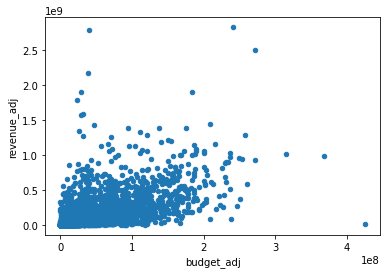

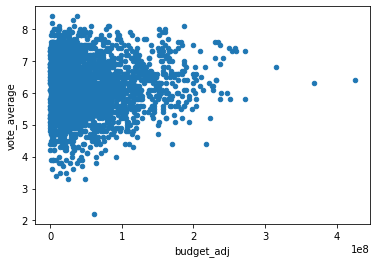

In [66]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#plot 2 scatter plots for budget(vote_average,revenue_adj)  
df.plot(x='budget_adj', y='revenue_adj', kind='scatter');  
df.plot(x='budget_adj', y='vote_average', kind='scatter');

### Research Question 2  (Does the average rating of movies increase or decrease as the year increases? On other words are the future movies more desired than old ones or the opposite?)

<AxesSubplot:title={'center':'Mean of vote_average of each year'}, xlabel='release_year'>

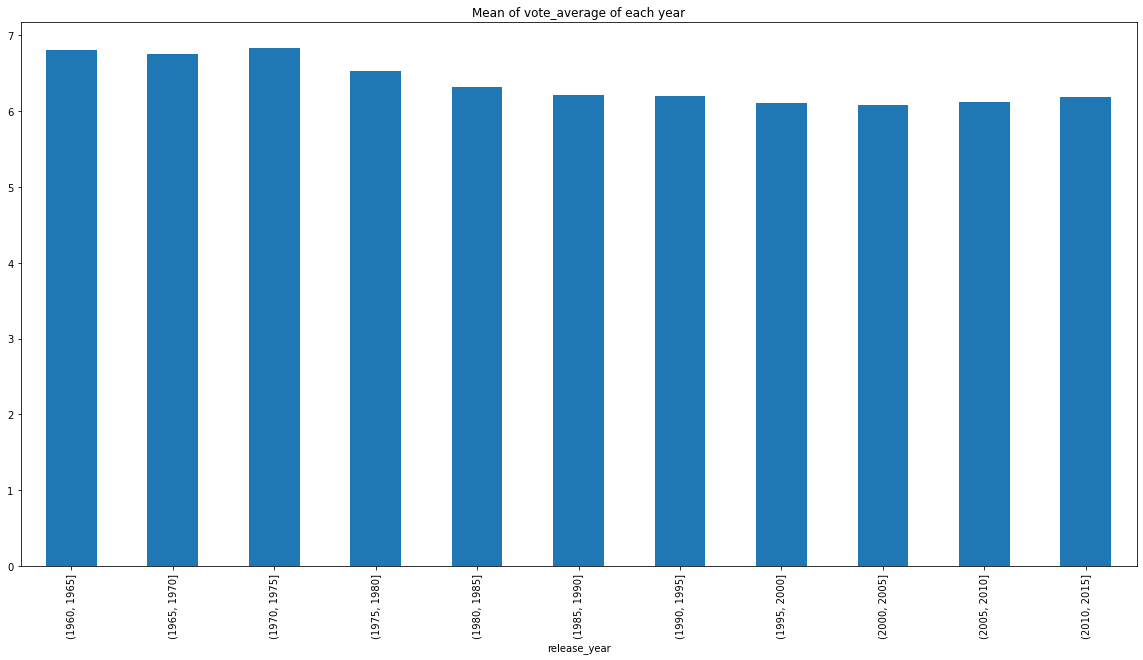

In [81]:
#group each 5 years and get the mean of vote_average of each 5 years
voting_for_5_years = df.groupby(pd.cut(df['release_year'], np.arange(1960, 2016, 5)))['vote_average'].mean()
voting_for_5_years
#plot the bar chart for the mean of vote_average of each year   
voting_for_5_years.plot(kind='bar', figsize=(20, 10), title='Mean of vote_average of each year')


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

 # conclusions
 1)As we can see there is no relation between budget spent and revenue or the budget spent and the average ratings of the movie <br>
 2)As the year value increase, The average ratings of the movies slightly decreases